# K-Means Clustering — From Scratch
This notebook guides you through implementing the K-Means clustering algorithm using only NumPy.
Complete all sections marked with **# TODO**. You are not Allowed to use predefined library for algorithm implementations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset (Iris)

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
df = pd.DataFrame(X, columns=["sepal_length", "sepal_width"])
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


## Visualize Dataset

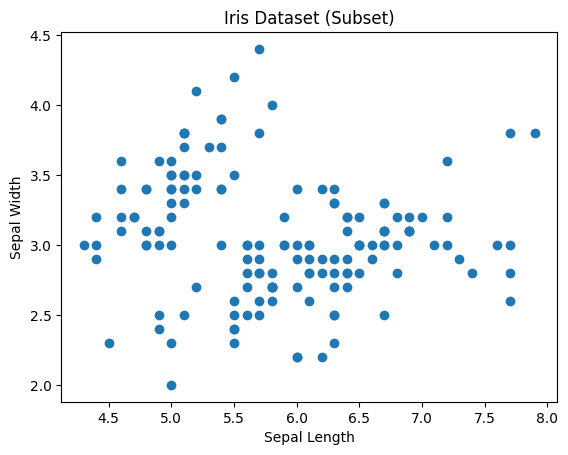

In [3]:
plt.scatter(df["sepal_length"], df["sepal_width"])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset (Subset)")
plt.show()

## Implement Distance Function

In [6]:
def euclidean_distance(a, b):
    """Compute Euclidean distance between vectors a and b."""
    return np.sqrt(np.sum((a - b) ** 2))

## Initialize Centroids

In [7]:
def initialize_centroids(X, K):
    """Randomly choose K points from dataset as initial centroids."""
    n_samples = X.shape[0]
    random_indices = np.random.choice(n_samples, size=K, replace=False)
    centroids = X[random_indices]
    return centroids

## Assign Points to Nearest Centroid

In [ ]:
def assign_clusters(X, centroids):
    """Assign each point to closest centroid."""
    n_samples = X.shape[0]
    K = centroids.shape[0]
    
    labels = np.zeros(n_samples, dtype=int)
    
    for i in range(n_samples):
        distances = []
        for k in range(K):
            dist = euclidean_distance(X[i], centroids[k])
            distances.append(dist)
        labels[i] = np.argmin(distances)
        
    return labels

## Recompute Centroids

In [18]:
def recompute_centroids(X, labels, K):
    """Compute new centroids as mean of assigned cluster points."""
    n_features = X.shape[1]
    centroids = np.zeros((K, n_features))
    
    for k in range(K):
        cluster_points = X[labels == k]
        
        centroids[k] = np.mean(cluster_points, axis=0)
            
    return centroids

## Full K-Means Algorithm

In [ ]:
def kmeans(X, K, max_iters=100, tol=1e-4):
    """Implement K-Means from scratch."""
    centroids = initialize_centroids(X, K)
    
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        
        old_centroids = centroids.copy()
        
        centroids = recompute_centroids(X, labels, K)
        
       
        shift = np.linalg.norm(centroids - old_centroids)
        
        if shift < tol:
            print(f"Converged at iteration {i}")
            break
            
    return centroids, labels

## Run K-Means

In [20]:
K = 3
centroids, labels = kmeans(df.values, K)

print("Final Centroids:\n", centroids)
print("First 10 Labels:", labels[:10])

Converged at iteration 7
Final Centroids:
 [[5.8        2.7       ]
 [6.82391304 3.07826087]
 [5.00392157 3.40980392]]
First 10 Labels: [2 2 2 2 2 2 2 2 2 2]


## Visualize Clustering Results

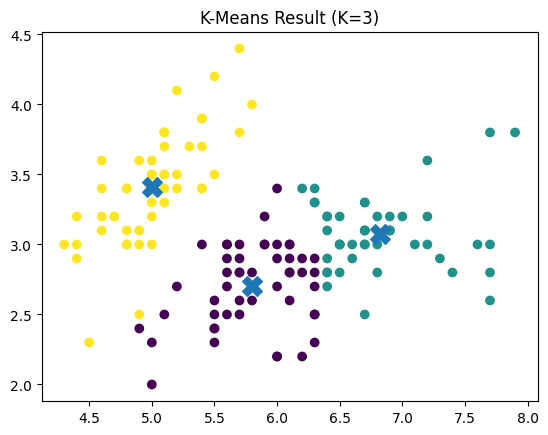

In [21]:
plt.scatter(df.values[:,0], df.values[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200)
plt.title(f"K-Means Result (K={K})")
plt.show()